#Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
import numpy as np
import operator

#Extracting data from csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rafaegont1/Trabalho-Python/main/deter-amz-aggregated-11-11-2022-14_30_36.csv')
df.head()

,year,month,area,uf,className,numPol
0,2015/2016,8,8.82,AC,CORTE_SELETIVO,3
1,2015/2016,8,9.71,AC,CS_DESORDENADO,1
2,2015/2016,8,4.11,AC,DEGRADACAO,18
3,2015/2016,8,25.12,AC,DESMATAMENTO_CR,261
4,2015/2016,8,1.81,AC,DESMATAMENTO_VEG,16


#Deforestation across the years

## Creating a dictionary of the area of deforestation across the years

In [3]:
dc_years = dict()
for year in df['year']:
  dc_years.setdefault(year, float())
dc_years = dict(sorted(dc_years.items(), key = lambda x : x[0]))

for year_df, area in zip(df['year'], df['area']):
  for year_dc in dc_years:
    if year_dc == year_df:
      dc_years[year_dc] += area
dc_years = {k: round(v, 2) for k, v in dc_years.items()}
print('Dictionary:',dc_years)
print('Maximum value:',max(dc_years.values()))
print('Minimum value:',min(dc_years.values()))
print('Mean:',round(np.average(list(dc_years.values())), 2))
print('Standard deviation:',round(np.std(list(dc_years.values())), 2))
print('Total:',sum(dc_years.values()))

Dictionary: {'2015/2016': 34175.64, '2016/2017': 28388.49, '2017/2018': 29627.76, '2018/2019': 14781.74, '2019/2020': 20681.4, '2020/2021': 29814.52, '2021/2022': 18235.37, '2022/2023': 18355.63}
Maximum value: 34175.64
Minimum value: 14781.74
Mean: 24257.57
Standard deviation: 6603.33
Total: 194060.55


##Ploting a chart

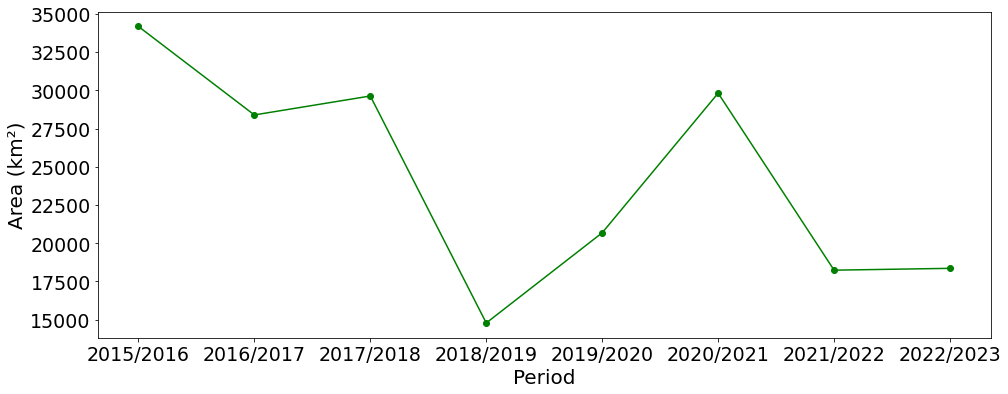

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(*zip(*dc_years.items()),color='green',marker='o',linestyle='solid')
plt.xlabel('Period', size = 20)
plt.ylabel('Area (km²)', size = 20)
plt.yticks(size = 19)
plt.xticks(size = 19)
plt.show()

##Normal distribution

Mean: 24257.57
Standard deviation: 6603.33


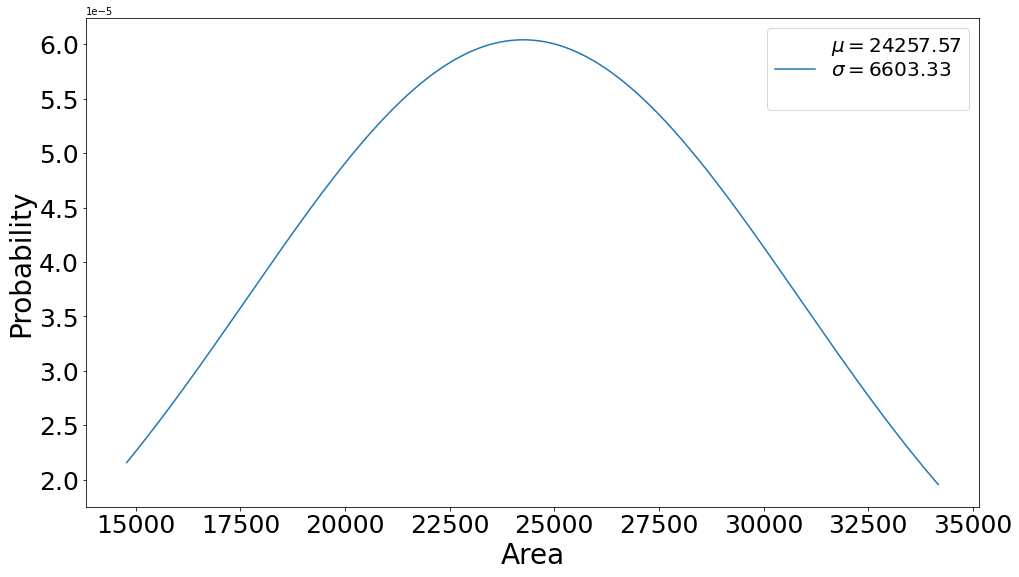

In [7]:
# generating multiple normal distributions
domain = np.linspace(min(list(dc_years.values())), max(list(dc_years.values())), 1000) # dividing the distance between -2 and 2 into 1000 points

# Mean
mu = round(np.average(list(dc_years.values())), 2)
print('Mean: %.2f' %(mu))

# Standard deviation
std = round(np.std(list(dc_years.values())), 2)
print('Standard deviation: %.2f' %(std))

plt.figure(figsize=(16, 9))
probabilities = norm.pdf(domain, mu, std) # pdf stands for Probability Density Function, which is the plot the probabilities of each range of values
plt.plot(domain, probabilities, label=f"$\mu={mu}$\n$\sigma={std}$\n")

plt.yticks(size = 25)
plt.xticks(size = 25)
plt.legend(fontsize=20)
plt.xlabel("Area",size=28)
plt.ylabel("Probability",size=28)
plt.show()

#Causes of deforestation

##Creating a dictionary of causes of deforestation

In [8]:
dc_causes = dict()
for sort in df['className']:
  dc_causes.setdefault(sort, float())
# dc = dict(sorted(dc.items(), key = lambda x : x[0]))

for className, area in zip(df['className'], df['area']):
  for sort in dc_causes:
    if sort == className:
      dc_causes[sort] += area

# Tirando áreas menores que uma porcentagem definida e colocando as em 'Others'
others = float()
to_delete = list()
for uf in dc_causes:
  if dc_causes[uf]/sum(dc_causes.values()) < 0.03:
    others += dc_causes[uf]
    to_delete.append(uf)

for uf in to_delete:
  del dc_causes[uf]
if others:
  dc_causes.update({"OTHERS": others})

dc_causes = dict(sorted(dc_causes.items(), key=operator.itemgetter(1),reverse=True))
dc_causes = {k: round(v, 2) for k, v in dc_causes.items()}

print('Dicionário:',dc_causes)

Dicionário: {'CICATRIZ_DE_QUEIMADA': 81138.76, 'DESMATAMENTO_CR': 49793.05, 'DEGRADACAO': 37093.32, 'CS_DESORDENADO': 10674.07, 'CS_GEOMETRICO': 7903.52, 'OTHERS': 7457.83}


##Ploting a pie chart

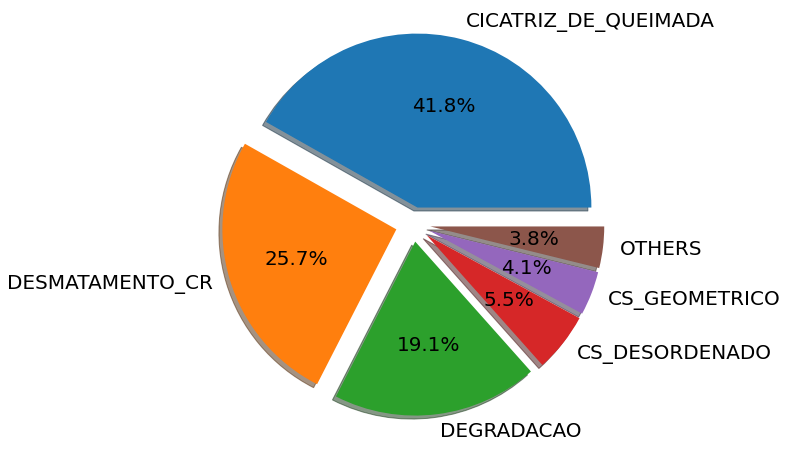

In [9]:
plt.figure(figsize=(8, 8))
plt.pie(dc_causes.values(), labels = dc_causes.keys(), autopct = '%1.1f%%', shadow = True, explode = [0.1 for i in dc_causes], textprops={'fontsize': 20})
plt.show()

#Deforestation by UF

##Creating a dictionary of area of deforestation by UF

In [10]:
# Criando um dicionário com os estados como chaves
dc_uf = dict()
for uf in df['uf']:
  dc_uf.setdefault(uf, float())
# dc = dict(sorted(dc.items(), key = lambda x : x[0]))

# Adicionando as áreas aos estados
total_area = float()
for uf_df, area in zip(df['uf'], df['area']):
  for uf_dc in dc_uf:
    if uf_dc == uf_df:
      dc_uf[uf_dc] += area
      total_area += area

# Tirando áreas menores que uma porcentagem definida e colocando as em 'Others'
others = float()
to_delete = list()
for uf in dc_uf:
  if dc_uf[uf]/total_area < 0.03:
    others += dc_uf[uf]
    to_delete.append(uf)

for uf in to_delete:
  del dc_uf[uf]
if others:
  dc_uf.update({"OTHERS": others})

# Arrredondando as áreas para duas casas decimais
dc_uf = {k: round(v, 2) for k, v in dc_uf.items()}

# Printando o resultado
print('Dicionário:',dc_uf)

Dicionário: {'AM': 15075.47, 'MA': 7715.14, 'MT': 76363.18, 'PA': 67381.79, 'RO': 12478.71, 'RR': 8293.61, 'OTHERS': 6752.65}


##Ploting a bar chart

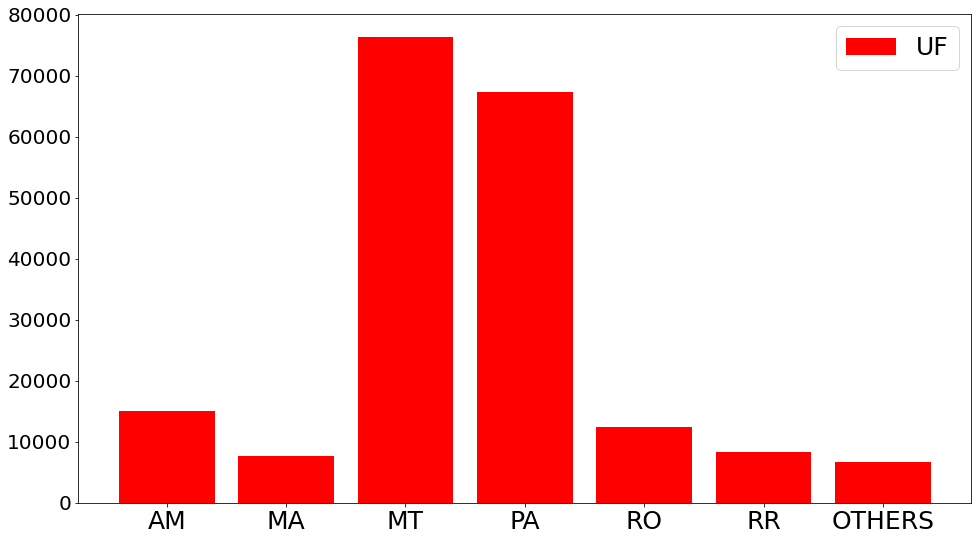

In [11]:
plt.figure(figsize=(16, 9))
plt.yticks(size = 20)
plt.xticks(size = 25)
plt.bar(dc_uf.keys(), dc_uf.values(), label = 'UF', color = 'r')
plt.legend(fontsize=25)
plt.show()